In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('./data/amazon_product_details.csv')

In [4]:
print(data.describe())
data.head()

        Actual_Price  Selling_Price
count    1085.000000    1185.000000
mean     6703.301696    3848.234599
std     12398.108429    8950.061845
min       299.000000      89.000000
25%      1290.000000     499.000000
50%      2999.000000    1125.000000
75%      4999.000000    2129.000000
max    118122.000000   80652.000000


,Title,Actual_Price,Selling_Price,Brand,Model,Colour,Form_Factor,Connectivity_Type
0,Dylect in-Ear Wired Earphone I Stereo Quality ...,299.0,188.0,Dylect,Dylect Wired Earphone,Black,In Ear,Wired
1,"Jabra Engage 65 Wireless Headset, Mono – Telep...",77914.0,57914.0,Jabra,Engage 65 Mono,Black,On Ear,Wireless
2,Jabra Elite 3 in Ear Bluetooth Truly Wireless ...,6999.0,4499.0,Jabra,Elite 3,Dark Grey,NaN,NaN
3,Zebronics Zeb-Sound Bomb 3 TWS In Ear Earbuds ...,3499.0,799.0,ZEBRONICS,Zeb - Sound Bomb 3 (Blue),Blue,In Ear,Wireless
4,(Renewed) boAt Airdopes 402 Bluetooth Truly Wi...,NaN,NaN,boAt,Boat Airdopes 408,Black,In Ear,Wireless


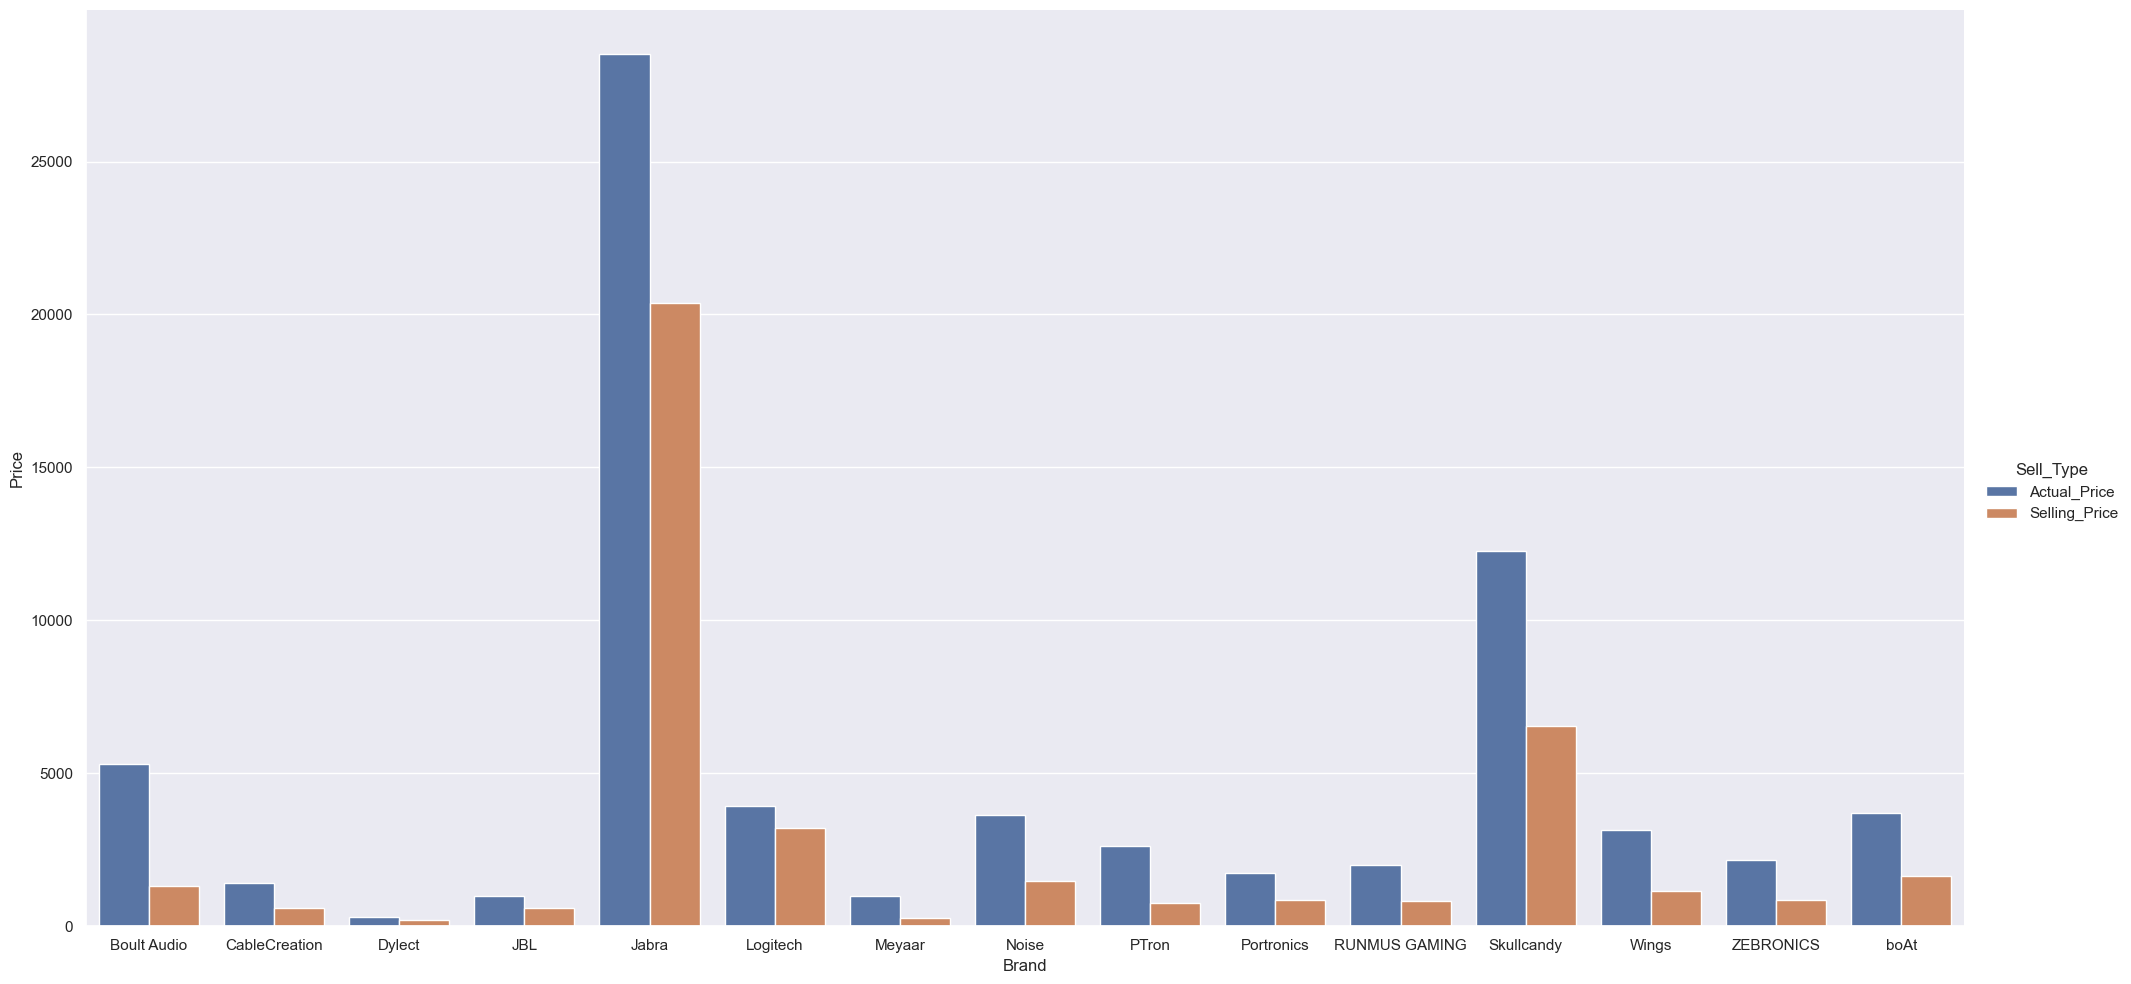

In [59]:
# average price and average sell price by brand
x = data['Brand'].unique()

act = data.groupby('Brand')['Actual_Price'].mean()
sel = data.groupby('Brand')['Selling_Price'].mean()

new_data = pd.DataFrame({'Brand': act.index, 'Actual_Price': act.values})
new_data = new_data.join(sel, on='Brand')
new_data = pd.melt(new_data, id_vars='Brand', var_name='Sell_Type', value_name='Price')

sns.catplot(data = new_data, x='Brand', y='Price', hue='Sell_Type', kind='bar', height=10, aspect=2)
plt.show()